In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import LinearRegression

dir_path = "/home/sunyi/CoT/Time-Constrained-CoT/latency/0107"


File: internlm2.5-7b_a800.csv - Linear Fit: Slope = 31.02, Intercept = -1.82
File: internlm2.5-7b_a800.csv - R^2 Score: 1.00
File: smallthinker-3b_a800.csv - Linear Fit: Slope = 38.82, Intercept = 0.90
File: smallthinker-3b_a800.csv - R^2 Score: 1.00
File: ministral-8b_a800.csv - Linear Fit: Slope = 33.67, Intercept = -3.54
File: ministral-8b_a800.csv - R^2 Score: 1.00
File: internlm2.5-20b_a800.csv - Linear Fit: Slope = 18.08, Intercept = -2.02
File: internlm2.5-20b_a800.csv - R^2 Score: 1.00
File: qwen2.5-32b_a800.csv - Linear Fit: Slope = 18.52, Intercept = 6.36
File: qwen2.5-32b_a800.csv - R^2 Score: 1.00
File: qwen2.5-math-1.5b_a800.csv - Linear Fit: Slope = 51.20, Intercept = 0.49
File: qwen2.5-math-1.5b_a800.csv - R^2 Score: 1.00
File: qwq_a800.csv - Linear Fit: Slope = 18.56, Intercept = 5.31
File: qwq_a800.csv - R^2 Score: 1.00
File: internlm2-math-7b_a800.csv - Linear Fit: Slope = 30.53, Intercept = -0.06
File: internlm2-math-7b_a800.csv - R^2 Score: 1.00
File: llama3.2-3b_a8

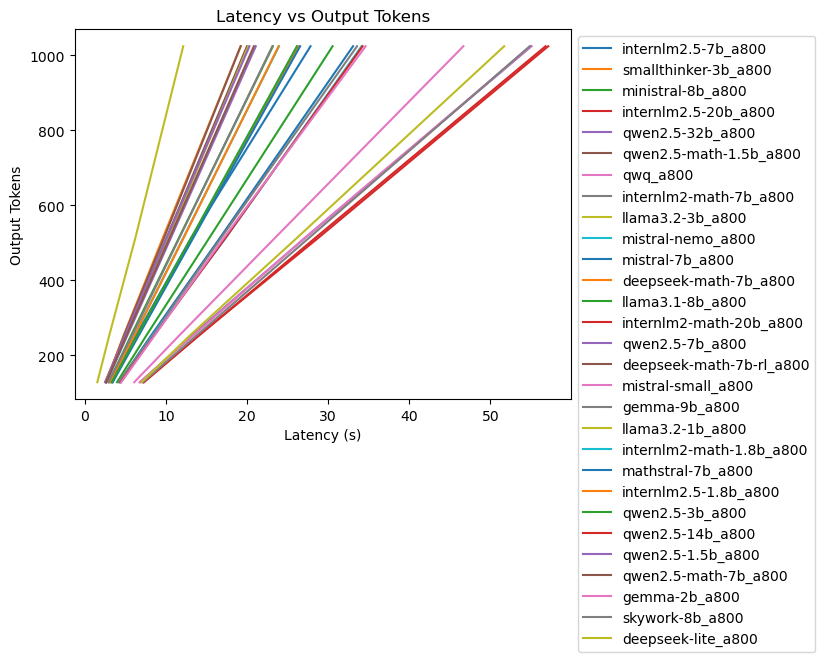

In [37]:
tokens = np.array([128, 256, 512, 1024])

# Read every csv file inside dir_path and plot
for file in os.listdir(dir_path):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(dir_path, file))
        latencies = df.iloc[0, 1:].values  # Extract latency values for the first row
        plt.plot(latencies, tokens, label=file.split(".csv")[0])
        
        # Perform linear regression on the latency data
        model = LinearRegression()
        latencies = latencies.reshape(-1, 1)
        model.fit(latencies, tokens)
        print(f"File: {file} - Linear Fit: Slope = {model.coef_[0]:.2f}, Intercept = {model.intercept_:.2f}")
        print(f"File: {file} - R^2 Score: {model.score(latencies, tokens):.2f}")

plt.xlabel('Latency (s)')
plt.ylabel('Output Tokens')
plt.title('Latency vs Output Tokens')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot
plt.show()